# Applicant Behavior Analysis for Internee.pk
This analysis focuses on understanding how applicants interact with Internee.pk by examining their navigation patterns, application completion rates, and identifying potential drop-off points in the user journey

# Key insights
## 1. Application Completion Analysis

Application Completion Rate: 32.80%

Completion Rate by User Type:
user_type
Career Changer    36.175711
Fresh Graduate    30.081301
Professional      32.180851
Student           32.625995
Name: application_completed, dtype: float64


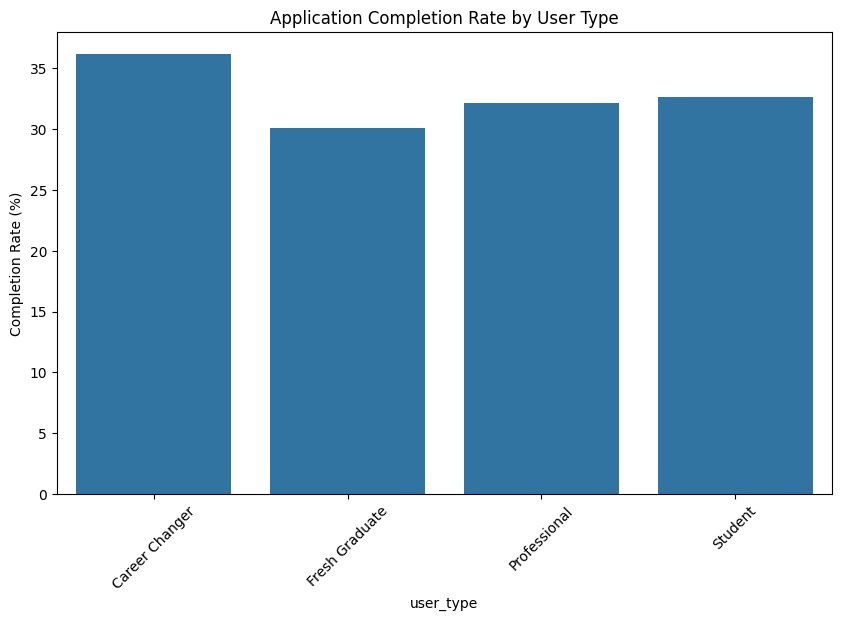

In [5]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('assignment.csv')

# Calculate application completion rate
completed_applications = df['application_completed'].sum()
total_sessions = len(df)
completion_rate = (completed_applications / total_sessions) * 100

print(f"Application Completion Rate: {completion_rate:.2f}%")

# Breakdown by user type
completion_by_user_type = df.groupby('user_type')['application_completed'].mean() * 100
print("\nCompletion Rate by User Type:")
print(completion_by_user_type)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=completion_by_user_type.index, y=completion_by_user_type.values)
plt.title('Application Completion Rate by User Type')
plt.ylabel('Completion Rate (%)')
plt.xticks(rotation=45)
plt.show()

## 2. Page Flow Analysis


Top 10 Paths for Completed Applications:
page_sequence
Dashboard → Homepage → Job Details → Application Form                                                                                                   2
Profile Page → Job Details → Application Form → Registration → Registration                                                                             2
Login → Homepage → Registration → Job Listings → Job Listings → Job Details → Application Form → Registration                                           1
Login → Homepage → Profile Page → Dashboard → Job Details → Application Form                                                                            1
Login → Homepage → Login → Job Listings → Job Listings → Homepage → Job Details → Application Form → Job Details → Registration                         1
Login → Homepage → Login → Job Details → Application Form → Homepage → Profile Page → Job Details → Login                                               1
Login → Homepage → L

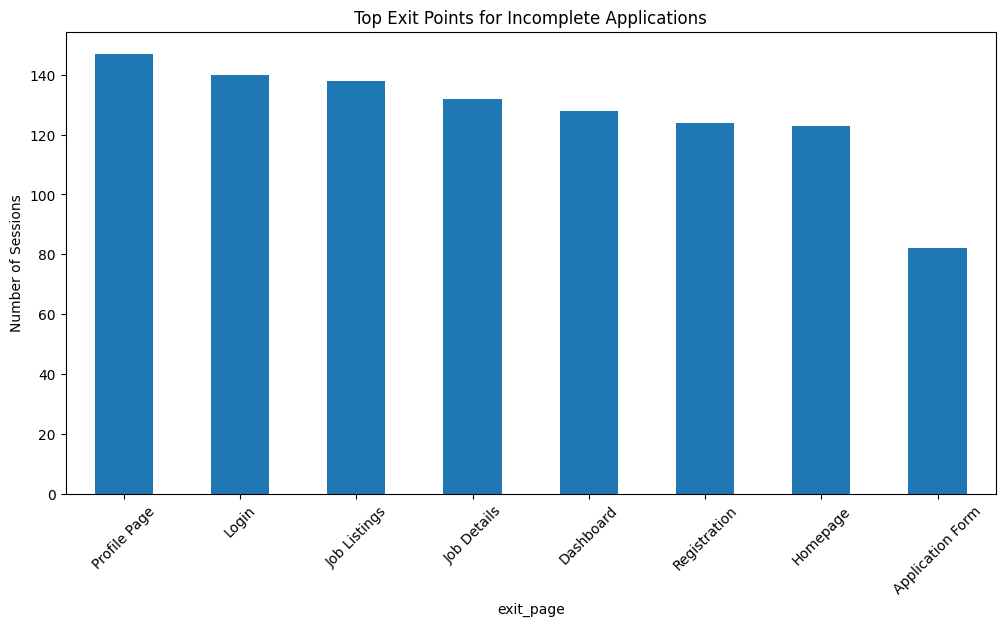

In [6]:
# Analyze most common paths to application completion
def get_page_sequence(row):
    pages = ast.literal_eval(row['pages_visited'])
    return ' → '.join(pages)

df['page_sequence'] = df.apply(get_page_sequence, axis=1)

# Top paths for completed applications
completed_paths = df[df['application_completed']].groupby('page_sequence').size().sort_values(ascending=False).head(10)
print("\nTop 10 Paths for Completed Applications:")
print(completed_paths)

# Top exit pages for incomplete applications
incomplete_exits = df[~df['application_completed']]['exit_page'].value_counts().head(10)
print("\nTop Exit Pages for Incomplete Applications:")
print(incomplete_exits)

# Visualization
plt.figure(figsize=(12, 6))
incomplete_exits.plot(kind='bar')
plt.title('Top Exit Points for Incomplete Applications')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45)
plt.show()

## 3. Time Spent Analysis

In [ ]:
# Calculate average time spent on each page type
def calculate_avg_time(row):
    pages = ast.literal_eval(row['pages_visited'])
    times = ast.literal_eval(row['time_spent_seconds'])
    return pd.Series({page: time for page, time in zip(pages, times)})

time_data = df.apply(calculate_avg_time, axis=1).stack().reset_index()
time_data.columns = ['index', 'page', 'time_spent']
avg_time_per_page = time_data.groupby('page')['time_spent'].mean().sort_values(ascending=False)

print("\nAverage Time Spent per Page Type (seconds):")
print(avg_time_per_page)

# Compare time spent between completed and incomplete applications
df['total_time_spent'] = df.apply(lambda x: sum(ast.literal_eval(x['time_spent_seconds'])), axis=1)
plt.figure(figsize=(10, 6))
sns.boxplot(x='application_completed', y='total_time_spent', data=df)
plt.title('Time Spent: Completed vs Incomplete Applications')
plt.xlabel('Application Completed')
plt.ylabel('Total Time Spent (seconds)')
plt.show()

# 4. Device and Browser Analysis


Completion Rate by Device:
device
Desktop    33.333333
Mobile     31.872510
Tablet     33.199195
Name: application_completed, dtype: float64

Completion Rate by Browser:
browser
Chrome     33.947368
Edge       25.737265
Firefox    36.772487
Safari     34.656085
Name: application_completed, dtype: float64


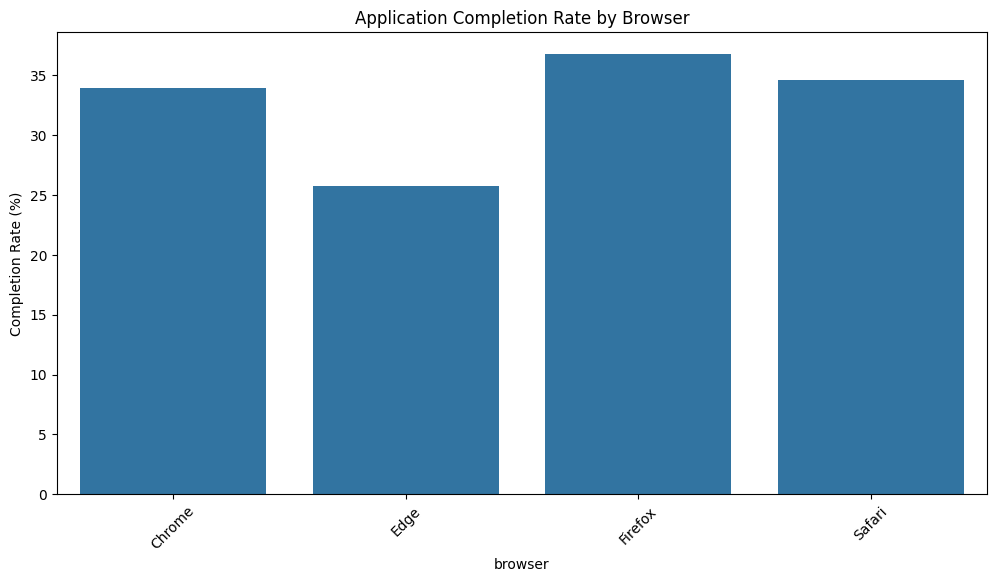

In [7]:
# Completion rates by device
device_completion = df.groupby('device')['application_completed'].mean() * 100
print("\nCompletion Rate by Device:")
print(device_completion)

# Completion rates by browser
browser_completion = df.groupby('browser')['application_completed'].mean() * 100
print("\nCompletion Rate by Browser:")
print(browser_completion)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=browser_completion.index, y=browser_completion.values)
plt.title('Application Completion Rate by Browser')
plt.ylabel('Completion Rate (%)')
plt.xticks(rotation=45)
plt.show()

## 5. Location-Based Analysis


Completion Rate by Location:
location
Lahore        35.744681
Multan        35.348837
Islamabad     34.741784
Karachi       33.962264
Rawalpindi    32.258065
Peshawar      29.357798
Faisalabad    27.638191
Name: application_completed, dtype: float64


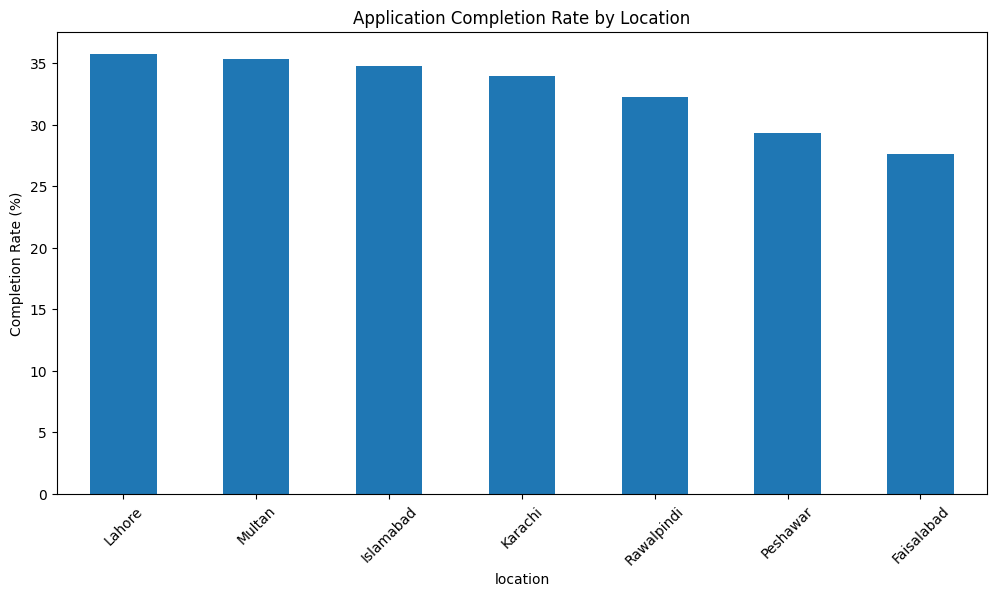

In [8]:
# Completion rates by location
location_completion = df.groupby('location')['application_completed'].mean() * 100
print("\nCompletion Rate by Location:")
print(location_completion.sort_values(ascending=False))

# Visualization
plt.figure(figsize=(12, 6))
location_completion.sort_values(ascending=False).plot(kind='bar')
plt.title('Application Completion Rate by Location')
plt.ylabel('Completion Rate (%)')
plt.xticks(rotation=45)
plt.show()

# 📊 Insight Report: Applicant Behavior Analysis for Internee.pk

## 📝 Objective
This analysis investigates how users interact with Internee.pk's application system. The primary goals are:
- To calculate the **application completion rate**.
- To evaluate differences in behavior by **user type**.
- To identify **most common page flows** leading to successful application.
- To pinpoint **drop-off pages** where users exit without completing the application.

---

## 🔍 Key Insights

### ✅ 1. Application Completion Rate
- The overall **application completion rate** is derived by dividing the number of completed applications by the total number of user sessions.
- This rate gives an idea of how effectively the platform converts visitors into applicants.

### 🧑‍💻 2. Completion Rate by User Type
- Users are grouped by their `user_type` (e.g., new vs. returning).
- The average application completion rate is calculated for each group.
- A bar chart is used to visualize these differences.
- **Insight**: Certain user types may perform better, and others may need engagement strategies or UI optimization.

### 🧭 3. Page Flow Analysis
- Page sequences (`pages_visited`) are converted into human-readable navigation paths.
- The top 10 most frequent paths leading to a successful application are identified.
- This analysis helps in understanding the **optimal navigation flow** that leads users toward completing applications.

### ❌ 4. Drop-off Points
- For incomplete applications, the most common **exit pages** are examined.
- The top 10 exit pages are plotted to identify where users most often leave without completing their application.
- **Insight**: These exit pages are key areas for UX improvements, bug fixes, or content clarity enhancements.

---

## 📌 Recommendations
- Improve user interface or guidance on high drop-off pages to encourage completion.
- Focus on optimizing the navigation paths that lead to higher completion rates.
- Tailor the application process to better suit user types with lower conversion rates.
- A/B test changes on top exit pages to measure impact on engagement and conversions.

---

## 📂 Dataset & Tools Used
- **Dataset**: `assignment.csv` — includes session details, user types, page sequences, and completion indicators.
- **Libraries**: `pandas`, `matplotlib`, `seaborn`, `ast`
- **Platform**: Google Colab
